In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np



Nous utilisérons dataset load_breast_cancer

- Importer le dateset

- Définir les ensembles d'apprentissage (%75) et test (%25) en mettant random_state=44. 

- Chaque donnée a combien d'attributs?

- Il y a combien de données dans l'ensemble d'apprentissage  (test)


In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.25, random_state=44)
nombre_attributs = len(data.feature_names)
print("Chaque donnée a", nombre_attributs, "attributs.")
nombre_donnees_apprentissage = len(X_train)
nombre_donnees_test = len(X_test)
print("Il y a", nombre_donnees_apprentissage, "données dans l'ensemble d'apprentissage.")
print("Il y a", nombre_donnees_test, "données dans l'ensemble de test.")


Chaque donnée a 30 attributs.
Il y a 426 données dans l'ensemble d'apprentissage.
Il y a 143 données dans l'ensemble de test.


Nous utilisérons une autre méthode  d'apprentissage  supervisé (SVM)

from sklearn.svm import SVC

https://scikit-learn.org/stable/modules/svm.html

Vous suivrez la même procédure d'apprentissage vu en cours et en TP.

- Faites l'apprentissage. Quel est le "score" (accuracy_score) pour l'ensemble de test

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Le score d'exactitude sur l'ensemble de test est :", accuracy)

Le score d'exactitude sur l'ensemble de test est : 0.958041958041958


Faites le prétraitement des données par StandardScaler

from sklearn.preprocessing import StandardScaler

- Mettez les données prétraitées sur les variables X_train_s, X_test_s

- Affichez la valeur moyenne  et déviation standard des données prétraitées ( Numpy, mean, std)

- Faites l'apprentissage sur les données prétraitées. Quel est le score sur les données de test?


In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

import numpy as np

moyenne = np.mean(X_train_s, axis=0)
std_deviation = np.std(X_train_s, axis=0)
print("Valeur moyenne des données prétraitées :", moyenne)
print("Déviation standard des données prétraitées :", std_deviation)
svm_model.fit(X_train_s, y_train)
y_pred_s = svm_model.predict(X_test_s)
accuracy_s = accuracy_score(y_test, y_pred_s)
print("Le score sur les données de test après prétraitement est :", accuracy_s)


Valeur moyenne des données prétraitées : [-2.41903524e-15 -1.02382891e-15 -1.18006804e-15 -5.00121593e-16
 -9.33134634e-15 -2.08570772e-15  6.86461842e-16  1.25981646e-15
 -4.03198601e-15  1.31142489e-14  1.99201636e-15  3.02053635e-16
  1.36627798e-15 -5.96288798e-16  1.87755719e-15 -5.64233063e-16
 -9.48641270e-17  2.64003738e-16  2.35596623e-16  6.42678399e-16
  1.29473896e-15  4.45261981e-15 -1.75733189e-15 -7.68295182e-16
  6.72773001e-15  4.34967659e-16 -4.17506405e-16  1.33747994e-15
 -2.15744220e-15 -4.05778697e-16]
Déviation standard des données prétraitées : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Le score sur les données de test après prétraitement est : 0.986013986013986


**Reduction de dimension**

Pour visualiser et pour accélerer ML

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

- Dimuniez le nombre d'attributs à 2 
(Vous utilisez les données normalisées)

from sklearn.decomposition import PCA # Principal Component Analysis

- Dessinez ce dataset axe x: Feature 0, axe y: Feature 1, les points en couleurs en fonction de y (0-1)


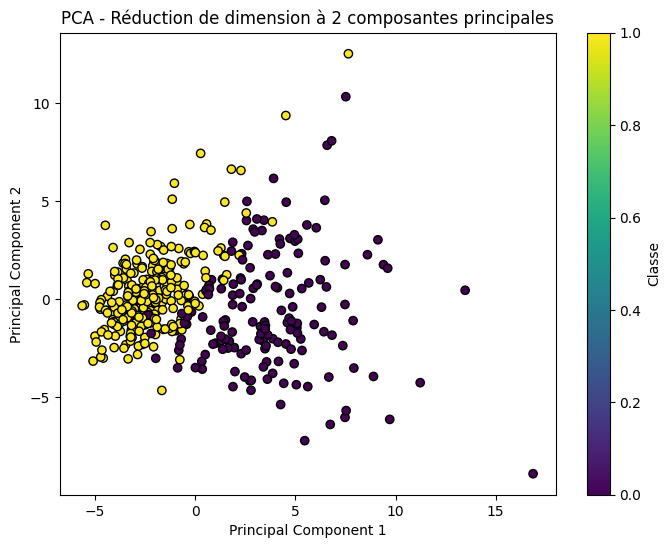

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_s)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Réduction de dimension à 2 composantes principales')
plt.colorbar(label='Classe')
plt.show()

 Faites l'apprentissage avec les données réduite. Quelle est la complexité sur l'ensemble de test?

In [19]:
svm_model.fit(X_train_pca, y_train)
X_test_pca = pca.transform(X_test_s)
y_pred_pca = svm_model.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print("Le score sur l'ensemble de test réduit est :", accuracy_pca)

Le score sur l'ensemble de test réduit est : 0.965034965034965


Quel est le paramètre explained_variance_ratio_ de votre modèle?

In [20]:
variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio par composante principale :", variance_ratio)

Explained variance ratio par composante principale : [0.43716814 0.20201484]


Dessinez une figure axe x: nombre de composantes[1-10], axe y:explained_variance_ratio_.sum()  du modèle



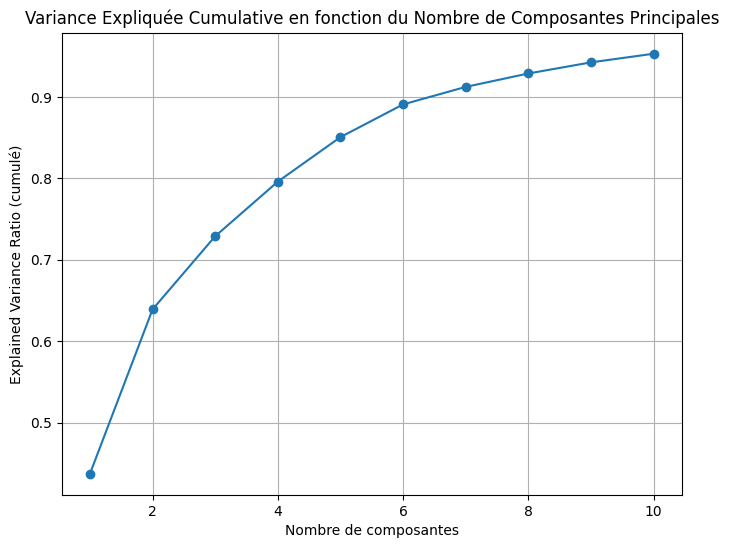

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

variance_cumulative = []

for n_components in range(1, 11):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_s)
    variance_cumulative.append(np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), variance_cumulative, marker='o', linestyle='-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Explained Variance Ratio (cumulé)')
plt.title('Variance Expliquée Cumulative en fonction du Nombre de Composantes Principales')
plt.grid(True)
plt.show()

Dessinez une figure axe x: nombre de composantes[1-10],
    axe y:  score du modèle de l'ensemble de test
        

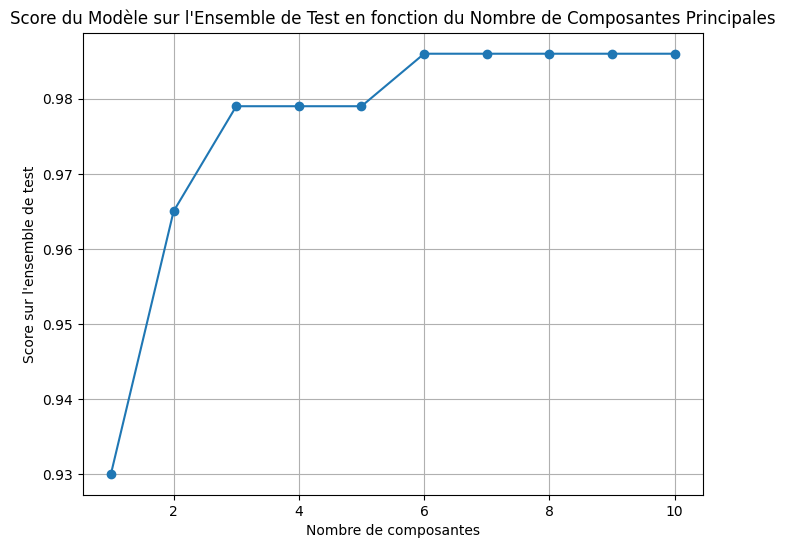

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

scores = []

for n_components in range(1, 11):
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_s)
    X_test_pca = pca.transform(X_test_s)
    svm_model.fit(X_train_pca, y_train)
    y_pred_pca = svm_model.predict(X_test_pca)
    score = accuracy_score(y_test, y_pred_pca)
    scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), scores, marker='o', linestyle='-')
plt.xlabel('Nombre de composantes')
plt.ylabel('Score sur l\'ensemble de test')
plt.title('Score du Modèle sur l\'Ensemble de Test en fonction du Nombre de Composantes Principales')
plt.grid(True)
plt.show()

Considérez toutes les données.

Faites le prétraitement avec MinMaxScaler 

Faites la réduction d'attributs avec PCA=2

Nous ferons  l'apprentissage non supervisé avec Kmeans avec le nombre de clusters =2.

Regardez  le notebook apprentissage non supervisé du CM.

Dessinez les données et les résultats du clustering sur la même figure







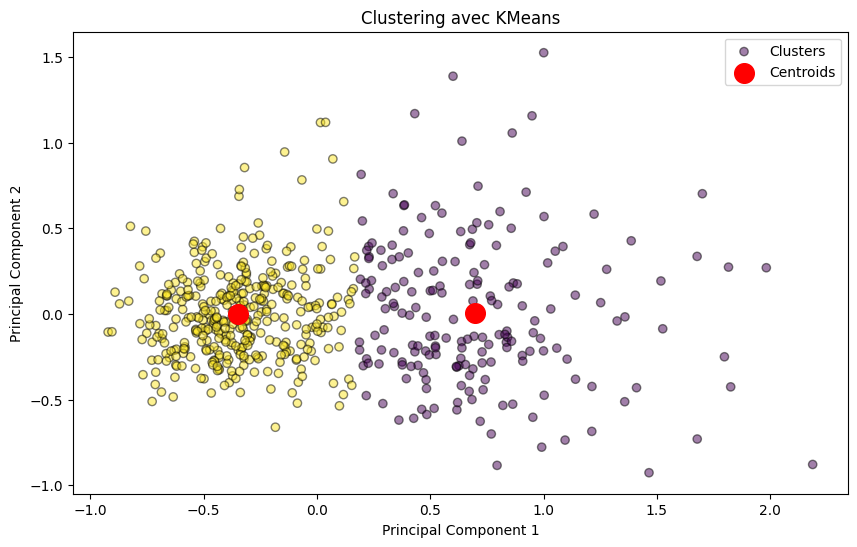

In [23]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data.data)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', edgecolor='k', alpha=0.5, label='Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, color='red', label='Centroids')
plt.legend()
plt.title('Clustering avec KMeans')
plt.show()

Nous  souhaitons calculer la distorsion  du clustering avec le nombre de clusters=2.

- Quelle est la distorsion lorsque PCA=2, clusters=2


In [24]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
distorsion = kmeans.inertia_
print("La distorsion du clustering avec PCA=2 et clusters=2 est :", distorsion)

La distorsion du clustering avec PCA=2 et clusters=2 est : 110.9715087830788


Serait-il possible de préciser seulement le score sans préciser le nombre de  composantes? Vous pouvez chercher dans la documentation du logiciel. Quel est le nombre de composantes si on souhaite avoir le score 0.99 sur les données de test?

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_s)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
num_components_for_099_score = np.argmax(cumulative_variance_ratio >= 0.99) + 1
print("Le nombre de composantes pour atteindre un score de 0.99 sur les données de test est :", num_components_for_099_score)

Le nombre de composantes pour atteindre un score de 0.99 sur les données de test est : 17
